In [10]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

In [29]:
import io
from PIL import Image as PILImage
from IPython.display import display, Image as IPImage


def plot_image_sequence(images, num_steps = None, path = None):
    # remove batch dimension if it exists
    if not isinstance(images, list) and images.shape[0] == 1:
        images = images[0]

    def get_image_data(images, t):
        img = images[t]
        
        if img.shape[-1] == 3:
            # color
            return PILImage.fromarray(img)
        elif len(img.shape) == 3:
            # 2-channel grayscale
            return PILImage.fromarray((np.array(img[0])).astype(np.uint8)).resize((256, 256), PILImage.NEAREST)
        elif len(img.shape) == 2:
            # grayscale
            return PILImage.fromarray((np.array(img)).astype(np.uint8)).resize((256, 256), PILImage.NEAREST)
        else:
            print(img.shape)
            raise Exception("Unknown image format")

    if num_steps is None:
        if isinstance(images, list):
            num_steps = len(images)
        else:
            num_steps = images.shape[0]

    pil_images = []
    for i in range(num_steps):
        pil_images.append(get_image_data(images, i))

    # Save as GIF
    gif_buffer = io.BytesIO()
    if path is None:
        pil_images[0].save(gif_buffer, format='GIF', append_images=pil_images[1:], save_all=True, duration=1000/30, loop=0)
        # Display in Jupyter Notebook
        display(IPImage(data=gif_buffer.getvalue(), width=256, height=256))
    else:
        pil_images[0].save(path, format='GIF', append_images=pil_images[1:], save_all=True, duration=1000/30, loop=0)

In [6]:
data = jnp.load('trajectory-1707900668.7044597.npz')['timesteps']

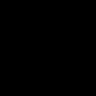

In [35]:
plot_image_sequence(data[:, 0, ..., 3:6], num_steps = 10_000)